# Objective
**The objective of this project is to build a machine learning model using the Random Forest algorithm to predict whether a bank loan application will be approved or not, based on applicant and financial details. This can help automate loan approval processes and support data-driven decision-making in banking.**

In [1]:
import numpy as np 
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading dataset

In [2]:
df = pd.read_csv(r"C:\Users\KaushalDhumal\Downloads\ML\Bank_Loan.csv")
df.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


In [3]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  981 non-null    int64 
 1   Gender               957 non-null    object
 2   Married              978 non-null    object
 3   Dependents           981 non-null    int64 
 4   Education            981 non-null    object
 5   Self_Employed        926 non-null    object
 6   ApplicantIncome      981 non-null    int64 
 7   LoanAmount           981 non-null    int64 
 8   Previous_Loan_Taken  981 non-null    object
 9   Cibil_Score          981 non-null    int64 
 10  Property_Area        981 non-null    object
 11  Customer_Bandwith    981 non-null    object
 12  Tenure               981 non-null    int64 
 13  Loan_Status          981 non-null    object
dtypes: int64(6), object(8)
memory usage: 107.4+ KB


In [5]:
df.shape

(981, 14)

In [6]:
df.isnull().sum()

Age                     0
Gender                 24
Married                 3
Dependents              0
Education               0
Self_Employed          55
ApplicantIncome         0
LoanAmount              0
Previous_Loan_Taken     0
Cibil_Score             0
Property_Area           0
Customer_Bandwith       0
Tenure                  0
Loan_Status             0
dtype: int64

# Handling Missing values

In [7]:
df.Gender.value_counts(dropna = False)

Male      775
Female    182
NaN        24
Name: Gender, dtype: int64

In [8]:
df.Self_Employed.value_counts(dropna = False)

No     807
Yes    119
NaN     55
Name: Self_Employed, dtype: int64

In [9]:
df.Married.value_counts(dropna = False)

Yes    631
No     347
NaN      3
Name: Married, dtype: int64

In [10]:
for i in ['Gender', 'Married', 'Self_Employed']:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [11]:
df.isnull().sum()

Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64

In [12]:
df.describe(include='all')

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
count,981.000000,981,981,981.000000,981,981,981.000000,981.000000,981,981.000000,981,981,981.000000,981
unique,NaN,2,2,NaN,2,2,NaN,NaN,2,NaN,3,3,NaN,2
top,NaN,Male,Yes,NaN,Graduate,No,NaN,NaN,Yes,NaN,Semiurban,Good,NaN,No
freq,NaN,799,634,NaN,763,862,NaN,NaN,813,NaN,349,694,NaN,712
mean,39.474006,NaN,NaN,2.496432,NaN,NaN,60130.703364,545276.096840,NaN,702.491335,NaN,NaN,26.245668,NaN
std,12.328438,NaN,NaN,1.730058,NaN,NaN,22996.542519,258711.895172,NaN,136.888817,NaN,NaN,12.984441,NaN
min,18.000000,NaN,NaN,0.000000,NaN,NaN,20025.000000,100016.000000,NaN,300.000000,NaN,NaN,5.000000,NaN
25%,30.000000,NaN,NaN,1.000000,NaN,NaN,40011.000000,320773.000000,NaN,635.000000,NaN,NaN,15.000000,NaN
50%,40.000000,NaN,NaN,2.000000,NaN,NaN,60862.000000,541282.000000,NaN,712.000000,NaN,NaN,27.000000,NaN
75%,50.000000,NaN,NaN,4.000000,NaN,NaN,79427.000000,770135.000000,NaN,808.000000,NaN,NaN,38.000000,NaN


# EDA

# Univarate Analysis

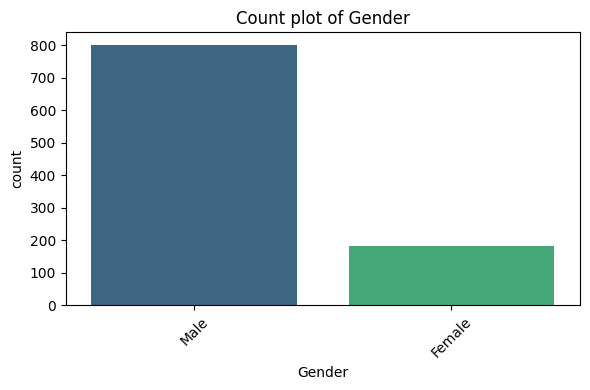

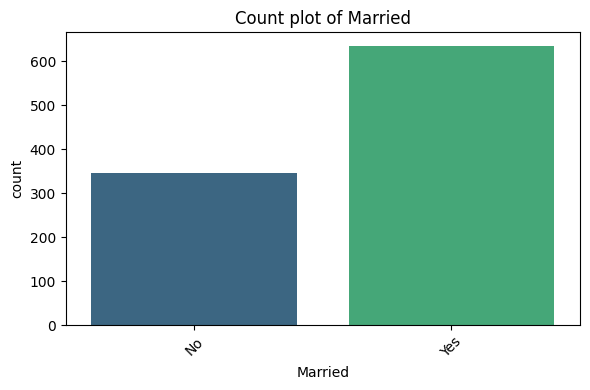

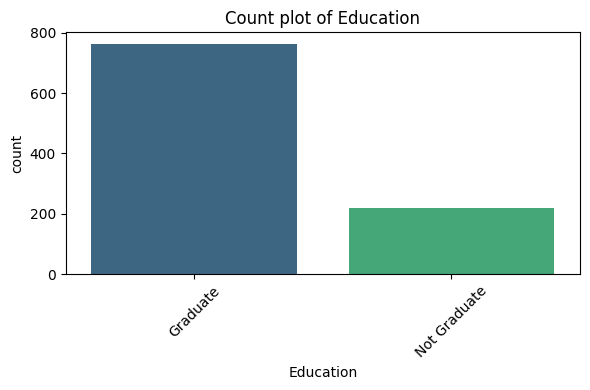

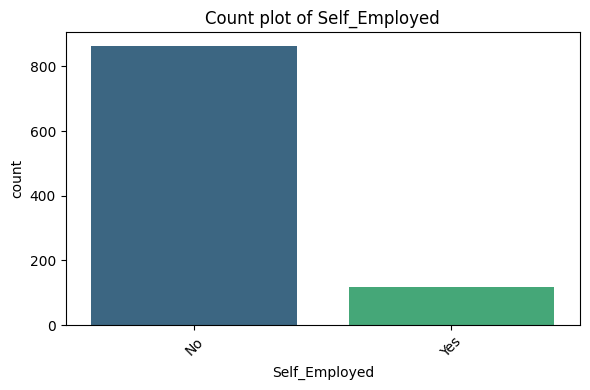

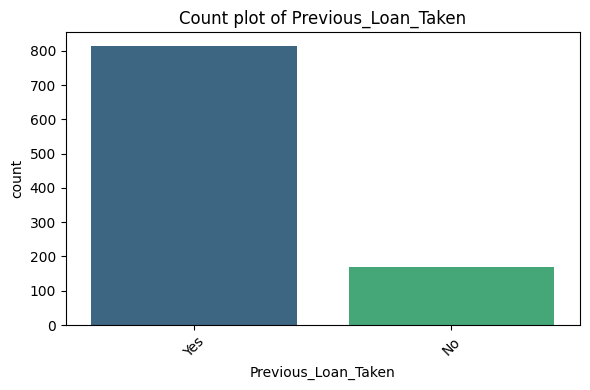

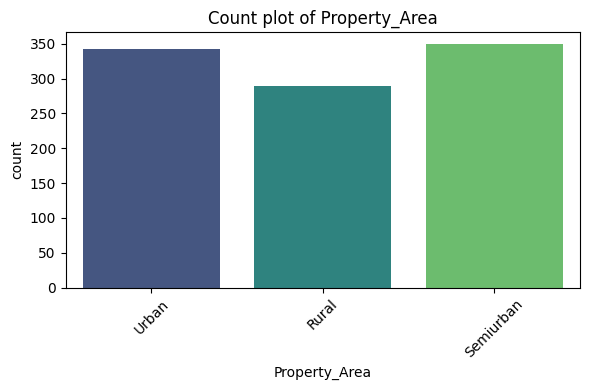

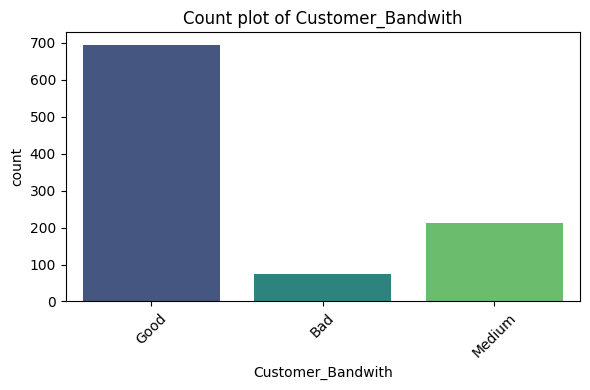

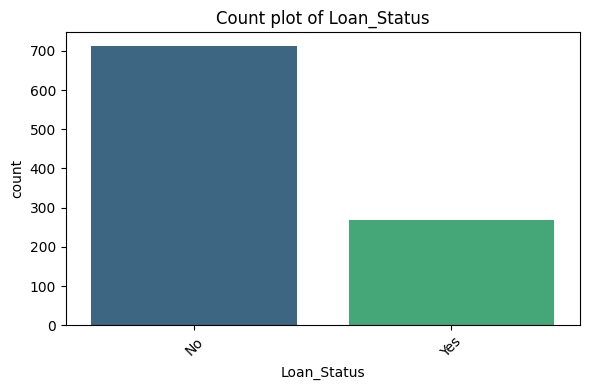

In [13]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


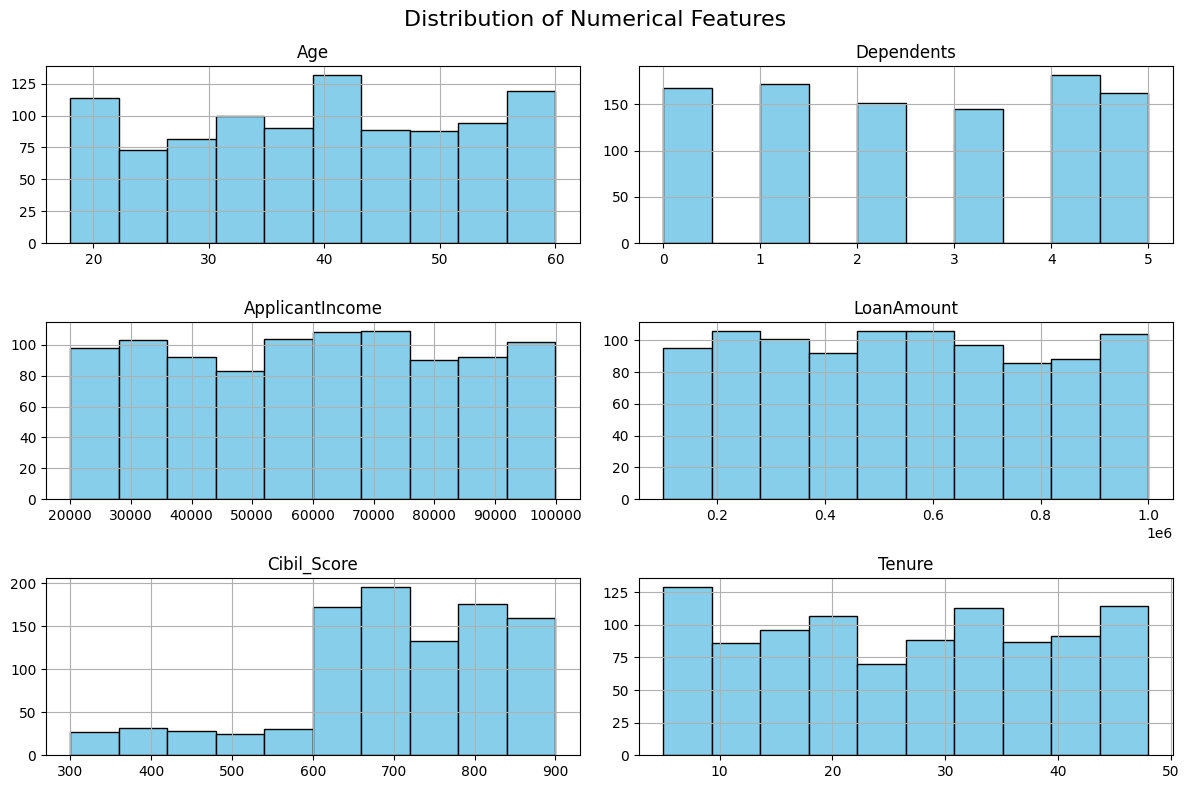

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


# Bivarate Anlaysis

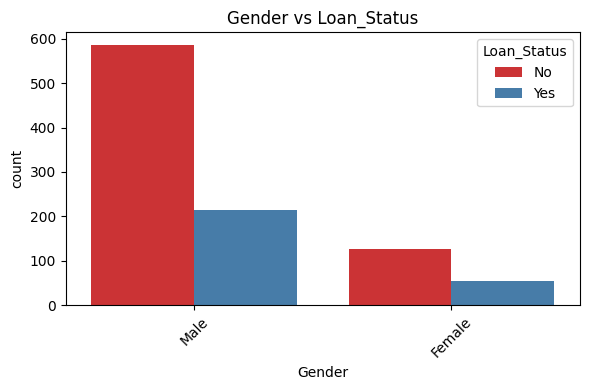

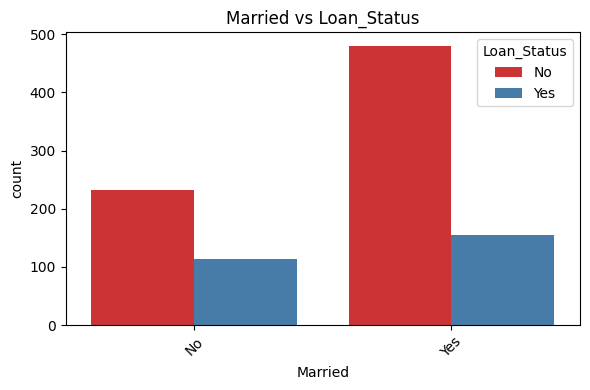

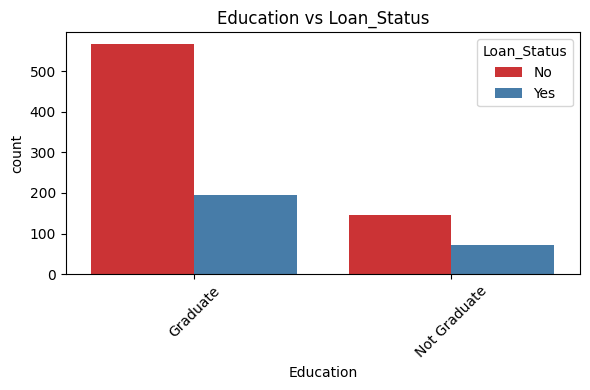

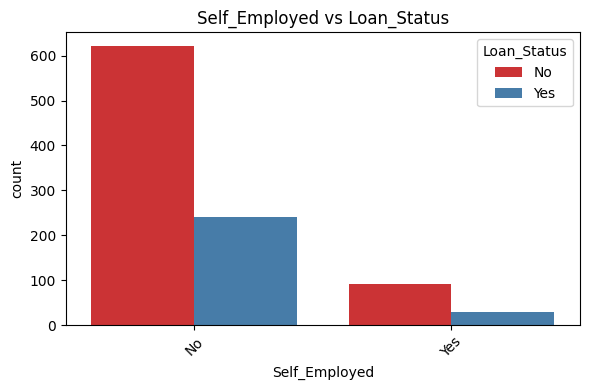

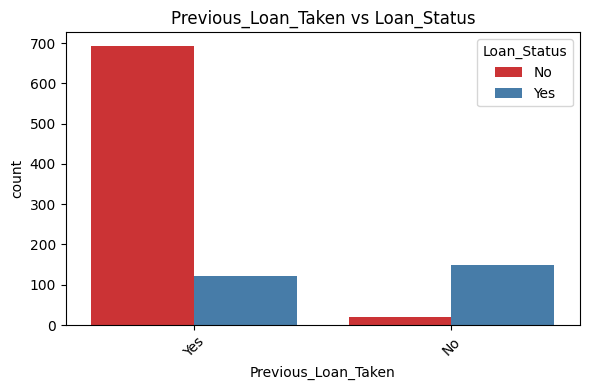

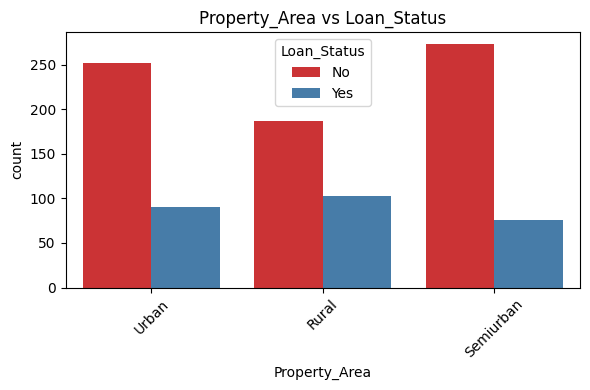

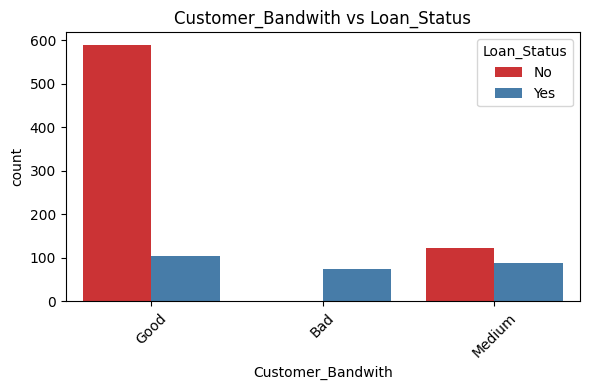

In [15]:
target = 'Loan_Status'  # Change this if your target is named differently

for col in categorical_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue=target, palette='Set1')
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


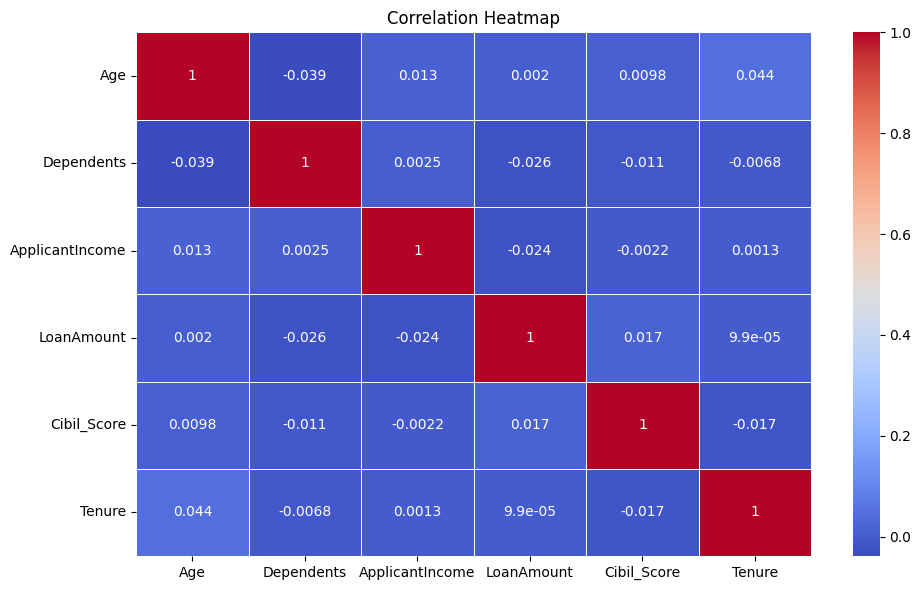

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# Labeling the data

In [17]:
num = df.select_dtypes(include=[np.number])
num.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,43,3,54005,334113,668,43
1,57,2,28817,736026,684,13
2,25,3,99939,712432,788,10
3,44,1,38470,267161,888,9
4,58,1,28991,402474,703,11


In [18]:
cat = df.select_dtypes(include=['object'])
cat.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,Male,No,Graduate,No,Yes,Urban,Good,No
1,Male,Yes,Graduate,No,Yes,Rural,Good,Yes
2,Male,Yes,Graduate,Yes,Yes,Urban,Good,No
3,Male,Yes,Not Graduate,No,Yes,Urban,Good,No
4,Male,No,Graduate,No,Yes,Urban,Good,No


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

cat = cat.apply(LabelEncoder().fit_transform)
cat.head()

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,1,0,0,0,1,2,1,0
1,1,1,0,0,1,0,1,1
2,1,1,0,1,1,2,1,0
3,1,1,1,0,1,2,1,0
4,1,0,0,0,1,2,1,0


In [20]:
data = pd.concat([num,cat], axis=1)
data.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,43,3,54005,334113,668,43,1,0,0,0,1,2,1,0
1,57,2,28817,736026,684,13,1,1,0,0,1,0,1,1
2,25,3,99939,712432,788,10,1,1,0,1,1,2,1,0
3,44,1,38470,267161,888,9,1,1,1,0,1,2,1,0
4,58,1,28991,402474,703,11,1,0,0,0,1,2,1,0


# Data Partition

In [21]:
from sklearn.model_selection import train_test_split

x = data.drop('Loan_Status', axis=1)
y = data[['Loan_Status']]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=142)

# Model Training

# Random Forest

In [22]:
# Step 9: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [10, 50],
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [23]:
model = best_model
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=10, n_estimators=50, random_state=42)

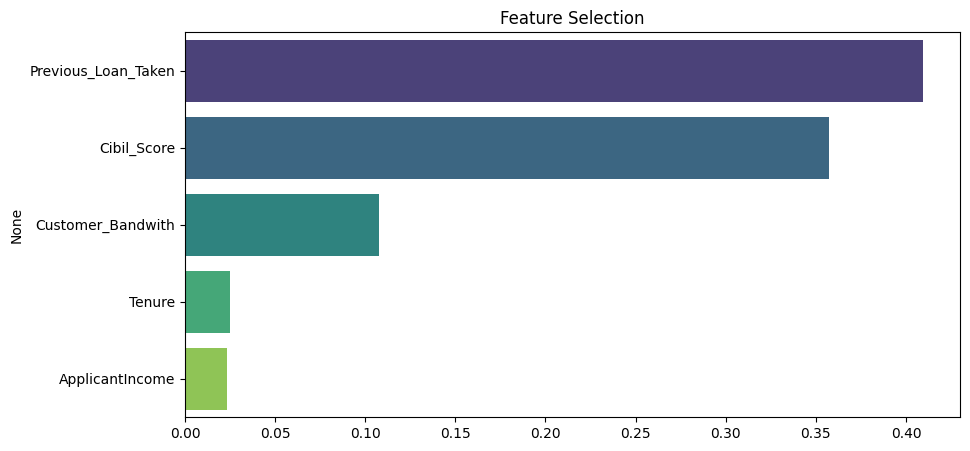

In [24]:
imp = pd.Series(data = model.feature_importances_, index = model.feature_names_in_).sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.title("Feature Selection")
ax = sns.barplot(y = imp.head().index, x = imp.head().values, palette="viridis")

# Top 5 Variables are:
    Cibil_Score
    Previous_Loan_Taken
    Customer_Bandwidth
    ApplicantIncome
    LoanAmount

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8984771573604061

Confusion Matrix:
 [[129   5]
 [ 15  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       134
           1       0.91      0.76      0.83        63

    accuracy                           0.90       197
   macro avg       0.90      0.86      0.88       197
weighted avg       0.90      0.90      0.90       197



# Predictions on Train Dataset

In [26]:
train = pd.concat([X_train, y_train], axis=1)

In [27]:
train['Predicted'] = model.predict(X_train)
train.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Predicted
303,48,5,61191,141657,684,16,1,1,0,0,1,2,1,0,0
637,20,0,54253,283302,802,6,0,0,1,0,1,2,1,0,0
444,55,3,88773,579376,737,35,1,1,0,0,1,0,1,0,0
499,39,2,78961,296184,309,29,1,0,0,0,0,0,0,1,1
425,30,2,85012,530883,730,39,1,1,0,0,1,0,1,0,0


# Model Performance Metrics on Train Data

In [28]:
confusion_matrix = confusion_matrix(train['Predicted'],train['Loan_Status'])
print(confusion_matrix)

[[563  40]
 [ 15 166]]


In [29]:
print(classification_report(train['Loan_Status'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       578
           1       0.92      0.81      0.86       206

    accuracy                           0.93       784
   macro avg       0.93      0.89      0.91       784
weighted avg       0.93      0.93      0.93       784



# Predictions on Test Dataset

In [30]:
test = pd.concat([X_test, y_test], axis=1)

In [31]:
test['predicted'] = model.predict(X_test)
test.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,predicted
835,50,2,28112,324962,682,39,1,1,1,0,1,0,1,0,0
815,49,0,80621,961064,753,31,1,1,1,0,1,2,1,0,0
819,18,5,80398,294729,813,18,1,1,0,0,1,1,1,0,0
218,35,1,62925,228835,479,31,1,1,0,0,0,1,2,1,1
410,20,2,31025,757981,494,6,0,0,1,1,1,1,2,1,1


# Model Performance Metrics on Test Data

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test['Loan_Status'], test['predicted'])
print(cm)


[[129   5]
 [ 15  48]]


In [33]:
print(classification_report(test['Loan_Status'], test['predicted']))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       134
           1       0.91      0.76      0.83        63

    accuracy                           0.90       197
   macro avg       0.90      0.86      0.88       197
weighted avg       0.90      0.90      0.90       197



# Project Summary
In this project, we built a Random Forest Classifier to predict loan approval status based on applicant details. We performed data cleaning, exploratory data analysis, label encoding, and hyperparameter tuning using GridSearchCV. The final model achieved good accuracy and identified key features like Credit History and Applicant Income as important predictors.

# XG Boost

In [34]:
model_parameter = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]}

In [35]:
from xgboost import XGBClassifier

XGmodel = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=XGmodel, 
                    param_grid=model_parameter, 
                    cv=10, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train) 

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 5],
                         'n_estimators': [10, 50], 'reg_lambda': [0, 1]},
             scoring='accuracy', verbose=1)

In [36]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 10, 'reg_lambda': 1}


In [37]:
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
train = pd.concat([X_train,y_train],axis=1)
train['Predicted'] = final_mod.predict(X_train)  # MODEL = Final_mod
train.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Predicted
303,48,5,61191,141657,684,16,1,1,0,0,1,2,1,0,0
637,20,0,54253,283302,802,6,0,0,1,0,1,2,1,0,0
444,55,3,88773,579376,737,35,1,1,0,0,1,0,1,0,0
499,39,2,78961,296184,309,29,1,0,0,0,0,0,0,1,1
425,30,2,85012,530883,730,39,1,1,0,0,1,0,1,0,0


In [39]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       578
           1       0.94      0.81      0.87       206

    accuracy                           0.93       784
   macro avg       0.94      0.89      0.91       784
weighted avg       0.94      0.93      0.93       784



In [40]:
test = pd.concat([X_test,y_test],axis=1)
test['Predicted'] = final_mod.predict(X_test)  # MODEL = Final_mod
test.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Predicted
835,50,2,28112,324962,682,39,1,1,1,0,1,0,1,0,0
815,49,0,80621,961064,753,31,1,1,1,0,1,2,1,0,0
819,18,5,80398,294729,813,18,1,1,0,0,1,1,1,0,0
218,35,1,62925,228835,479,31,1,1,0,0,0,1,2,1,1
410,20,2,31025,757981,494,6,0,0,1,1,1,1,2,1,1


In [41]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       134
           1       0.91      0.76      0.83        63

    accuracy                           0.90       197
   macro avg       0.90      0.86      0.88       197
weighted avg       0.90      0.90      0.90       197



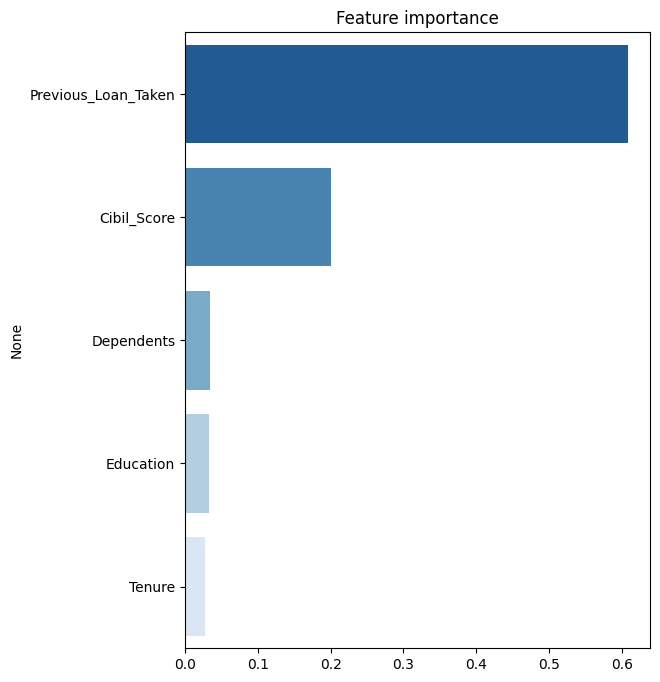

In [44]:
imp = pd.Series(data=final_mod.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

# Final Conclusion
Both Random Forest and XGBoost performed well on the bank loan prediction task, achieving ~90% accuracy on the test set.

🔹 Random Forest was fast, simple, and robust—great baseline model.
🔹 XGBoost, with tuned parameters, delivered a higher training accuracy and showed competitive test results, suggesting slightly better learning capacity.

✅ XGBoost is recommended as the final model due to its balance of performance and optimization flexibility. However, for small datasets, Random Forest remains a strong alternative due to its simplicity and speed.

